In [12]:
# Data Manipulations
import numpy as np
import pandas as pd

# for Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for modelling
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

# to prevent annoying warnings
import warnings
warnings.filterwarnings('ignore')

# set seaborn as default style
sns.set()

pd.set_option('max_columns', None)
pd.set_option('max_rows', None)
import warnings
warnings.filterwarnings('ignore')

OptionError: 'Pattern matched multiple keys'

In [2]:
def format_float(value):
    return f'{value:,.2f}'

In [3]:
def convert_bytes_to_megabytes(df, bytes_data):
    """
        This function takes the dataframe and the column which has the bytes values
        returns the megabytesof that value
        df -- dataframe
        bytes_data --  column with bytes values
    """
    megabyte = 1*10e+5
    df[bytes_data] = df[bytes_data] / megabyte
    return df[bytes_data]

In [5]:
df = pd.read_csv('../data/Task1.csv')
df.head()

,Unnamed: 0,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,...,Total Session Social Media,Total Session Email,Total Session Youtube,Total Session Netflix,Total Session Google,Total Session Gaming,Total Session Other,Total duration all session,xDR Session,session duration
0,0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,...,1570185.0,3701304.0,18355943.0,17855187.0,2905912.0,292426453.0,180558843.0,5.173738e+08,2,2083209.0
1,1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,...,1933278.0,937385.0,39359124.0,35565545.0,4414096.0,609920783.0,541959383.0,1.234090e+09,2,1698167.0
2,2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,...,1726277.0,3363124.0,34425237.0,23751202.0,10229119.0,229980251.0,414908351.0,7.183836e+08,1,1361762.0
3,3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,...,657493.0,2070983.0,36534765.0,15092588.0,11811761.0,810387875.0,761837216.0,1.638393e+09,1,1321509.0
4,4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,...,912788.0,2110349.0,34222253.0,17539799.0,7748843.0,531237049.0,564619822.0,1.158391e+09,1,1089009.0


In [6]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # dtype of missing values
        mis_val_dtype = df.dtypes
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'Dtype'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [8]:
missing_values_table(df)

Your selected dataframe has 67 columns.
There are 25 columns that have missing values.


,Missing Values,% of Total Values,Dtype
Nb of sec with 37500B < Vol UL,130253,86.8,float64
Nb of sec with 6250B < Vol UL < 37500B,111842,74.6,float64
Nb of sec with 125000B < Vol DL,97537,65.0,float64
TCP UL Retrans. Vol (Bytes),96648,64.4,float64
Nb of sec with 31250B < Vol DL < 125000B,93585,62.4,float64
Nb of sec with 1250B < Vol UL < 6250B,92893,61.9,float64
Nb of sec with 6250B < Vol DL < 31250B,88316,58.9,float64
TCP DL Retrans. Vol (Bytes),88145,58.8,float64
HTTP UL (Bytes),81809,54.5,float64
HTTP DL (Bytes),81473,54.3,float64


<h1>Fix Outliers<br>

Since we are to replace all outliers with medians for analysis purposes so we dont lose data. I wrote a function to do that by replacing all outliers values in a column greater than 95% with the median of that column

In [9]:
def fix_outlier(df, column):
    df[column] = np.where(df[column] > df[column].quantile(0.95),
                                        df[column].median(),
                                        df[column])
    return df[column]

In [10]:
df['TCP DL Retrans. Vol (Bytes)'] = fix_outlier(df, 'TCP DL Retrans. Vol (Bytes)')
df['TCP UL Retrans. Vol (Bytes)'] = fix_outlier(df, 'TCP DL Retrans. Vol (Bytes)')
df['Avg Bearer TP DL (kbps)'] = fix_outlier(df, 'Avg Bearer TP DL (kbps)')
df['Avg Bearer TP UL (kbps)'] = fix_outlier(df, 'Avg Bearer TP UL (kbps)')
df['Avg RTT DL (ms)'] = fix_outlier(df, 'Avg RTT DL (ms)')
df['Avg RTT UL (ms)'] = fix_outlier(df, 'Avg RTT UL (ms)')
df['Total Download and Upload'] = fix_outlier(df, 'Total Download and Upload')
df['Total duration all session'] = fix_outlier(df, 'Total duration all session')

In [13]:
# Outlier Identification  and dropping
print(df.shape)
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
df_out = df[~((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis=1)]
print(df_out.shape)

(150000, 67)
(61322, 67)


In [14]:
upper_q = df['TCP DL Retrans. Vol (Bytes)'].describe()['75%']
lower_q = df['TCP DL Retrans. Vol (Bytes)'].describe()['25%']
iqr = upper_q - lower_q
upper_whisker = upper_q + 1.5*iqr

In [15]:
print(df.shape)
df1 = df[df['TCP DL Retrans. Vol (Bytes)'] < upper_whisker]
print(df1.shape)

(150000, 67)
(54013, 67)


User Engagement Analysis
How often do customers use diffrent apps?
What is the average usage of apps per customer per app

Session Frequncy is the count of times each customer logged in or use an application

In [16]:
print('The total number of Unique Customer in our data is', df['MSISDN/Number'].nunique())

The total number of Unique Customer in our data is 106856


In [17]:
df.groupby('MSISDN/Number')['Bearer Id'].count().reset_index(name='Frequency xDR sessions').\
            sort_values(by='Frequency xDR sessions', ascending=False)[:10]

,MSISDN/Number,Frequency xDR sessions
13526,3.362632e+10,1083
13180,3.362578e+10,17
6437,3.361489e+10,17
37052,3.365973e+10,16
92923,3.376054e+10,15
76363,3.367588e+10,15
65118,3.366716e+10,13
13994,3.362708e+10,12
1279,3.360452e+10,12
92577,3.376041e+10,12


The 3 engagement metrics are Total Download and Upload, xDr Session and Session duration

<h1>Task 2.1 <br>
Aggregate the above metrics per customer id (MSISDN) and report the top 10 customers per engagement metric

In [18]:
df_eng_metrics = df[['MSISDN/Number', 'Total Download and Upload', 'xDR Session', 'session duration']]
df_eng_metrics.head()


,MSISDN/Number,Total Download and Upload,xDR Session,session duration
0,3.366496e+10,345629377.0,2,2083209.0
1,3.368185e+10,707185356.0,2,1698167.0
2,3.376063e+10,307690973.0,1,1361762.0
3,3.375034e+10,496861101.5,1,1321509.0
4,3.369980e+10,607681403.0,1,1089009.0


<h1>Top 10 CUstomers based on Aggregated values of Metrics <br>
Top 10 by Session Duration

In [19]:
eng_metrics = df_eng_metrics.groupby('MSISDN/Number')[['Total Download and Upload', 'xDR Session',
                                         'session duration']].sum().reset_index()
top_10_session = eng_metrics[['MSISDN/Number', 'session duration']].sort_values(by='session duration',ascending=False)[:10]
top_10_session


,MSISDN/Number,session duration
13526,3.362632e+10,8.798110e+10
13180,3.362578e+10,3.154138e+08
6437,3.361489e+10,1.694373e+08
92923,3.376054e+10,1.391915e+08
65118,3.366716e+10,1.136839e+08
666,3.360313e+10,7.545313e+07
76363,3.367588e+10,7.298920e+07
37052,3.365973e+10,6.456685e+07
92577,3.376041e+10,6.386000e+07
1279,3.360452e+10,6.249588e+07


<h1>Top 10 User by Download and Upload

In [21]:
top_10_dl_ul = eng_metrics[['MSISDN/Number', 'Total Download and Upload']].sort_values(by='Total Download and Upload',ascending=False)[:10]
top_10_dl_ul

,MSISDN/Number,Total Download and Upload
13526,3.362632e+10,5.167961e+11
92923,3.376054e+10,8.514774e+09
76363,3.367588e+10,7.891111e+09
13180,3.362578e+10,7.708153e+09
6437,3.361489e+10,7.601873e+09
37052,3.365973e+10,6.932144e+09
63028,3.366646e+10,6.530860e+09
57241,3.366471e+10,6.472725e+09
86455,3.369879e+10,6.149693e+09
30715,3.365836e+10,6.051459e+09


<h1>Top 10 User by xDr Session aka Frequency

In [22]:
eng_metrics[['MSISDN/Number', 'xDR Session']].sort_values(by='xDR Session',ascending=False)[:10]

,MSISDN/Number,xDR Session
13526,3.362632e+10,1172889
13180,3.362578e+10,289
6437,3.361489e+10,289
37052,3.365973e+10,256
92923,3.376054e+10,225
76363,3.367588e+10,225
65118,3.366716e+10,169
13994,3.362708e+10,144
1279,3.360452e+10,144
92577,3.376041e+10,144


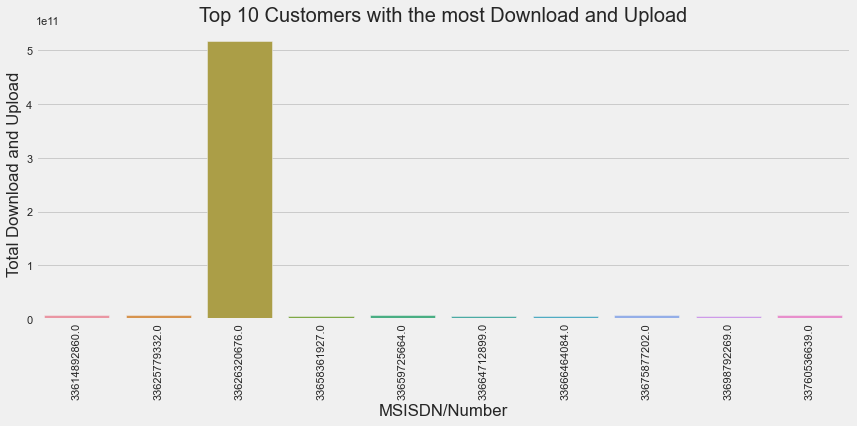

In [27]:
plt.figure(figsize=(13,5))
sns.barplot(data=top_10_dl_ul, x= 'MSISDN/Number', y='Total Download and Upload')
plt.title('Top 10 Customers with the most Download and Upload', size=20)
plt.xticks(rotation=90)
plt.show()
plt.style.use('fivethirtyeight')

Normalize each engagement metric and run a k-means (k=3) to classify                      customers in three groups of engagement.

In [28]:
df_metrics1 = df_eng_metrics.drop('MSISDN/Number', axis=1)
df_metrics_norm = (
        (df_metrics1 - df_metrics1.min()) 
            /
        (df_metrics1.max() - df_metrics1.min())
                  )

In [29]:
# run a k-means (k=3)
from sklearn.cluster import KMeans
kmeans = KMeans(init="k-means++",  n_clusters=3, random_state=42)
kmeans.fit(df_metrics_norm)

KMeans(n_clusters=3, random_state=42)

In [30]:
centroids_eng = kmeans.cluster_centers_
centroids_eng

array([[2.79461729e-01, 7.97276322e-04, 2.54096168e-03],
       [7.35883408e-01, 7.89294354e-04, 2.54337915e-03],
       [5.29602656e-01, 1.00000000e+00, 1.00000000e+00]])